In [51]:
%matplotlib inline
import re
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn import decomposition, preprocessing
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import display
import matplotlib.cm as cm

plt.rcParams['figure.figsize'] = (12.0, 10.0)


In [52]:
df = pd.read_csv('all-hpccg-redis-sklearn-ssca.csv')

In [53]:
df.columns

Index(['benchmark', 'machine', 'repetition', 'test', 'result'], dtype='object')

In [54]:
df.benchmark.unique()

array(['stressng', 'ssca', 'hpccg', 'scikit-learn', 'redisbench'], dtype=object)

In [55]:
df.test.unique()

array(['af-alg', 'atomic', 'bigheap', 'brk', 'bsearch', 'cache', 'cpu',
       'crypt', 'full', 'heapsort', 'hsearch', 'icache', 'lockbus',
       'longjmp', 'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore',
       'mmap', 'mremap', 'msync', 'nop', nan, 'numa', 'oom-pipe', 'opcode',
       'qsort', 'remap', 'resources', 'rmap', 'shm', 'shm-sysv', 'stack',
       'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm', 'vm-rw',
       'vm-splice', 'zero', 'ssca', 'hpccg', 'sklearn', 'SET', 'GET',
       'LPUSH', 'LPOP'], dtype=object)

In [35]:
df

,benchmark,machine,repetition,test,result
0,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,af-alg,7.553477e+03
1,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,atomic,6.997670e+05
2,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,bigheap,3.521001e+04
3,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,brk,6.847354e+05
4,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,bsearch,3.703138e+02
5,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,cache,3.399998e+00
6,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,cpu,2.698333e+02
7,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,crypt,1.578310e+02
8,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,full,2.808373e+05
9,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,heapsort,4.499998e+00


In [58]:
df = df.query('machine == "r320.quiho.schedock-PG0.apt.emulab.net" or machine == "issdm-0"')

In [59]:
df['machine+repetition'] = df.apply(lambda x: x['machine'] + '-' + str(x['repetition']), axis=1) 

In [60]:
len(df.index)

300

In [61]:
df.dropna(inplace=True)

In [62]:
len(df.index)

294

In [63]:
# pivot table to obtain features, where each microbenchmark is a feature
features = df.pivot_table(index=["machine+repetition","test"], values=['result'], fill_value=0, aggfunc=np.mean).unstack().reset_index()

In [64]:
# flatten the index
cols = features.columns.get_level_values(1).values
cols[0] = 'machine+repetition'
features.columns = cols
features.dropna(inplace=True)

In [65]:
# get features that we'll use
feature_columns = list(pd.Index(df.query('benchmark == "stressng"')['test'].unique()))

In [66]:
feature_columns

['af-alg',
 'atomic',
 'bigheap',
 'brk',
 'bsearch',
 'cache',
 'cpu',
 'crypt',
 'full',
 'heapsort',
 'hsearch',
 'icache',
 'lockbus',
 'longjmp',
 'lsearch',
 'malloc',
 'matrix',
 'memcpy',
 'mincore',
 'mmap',
 'mremap',
 'msync',
 'nop',
 'numa',
 'oom-pipe',
 'opcode',
 'qsort',
 'remap',
 'resources',
 'rmap',
 'shm',
 'shm-sysv',
 'stack',
 'stackmmap',
 'str',
 'stream',
 'tsearch',
 'vecmath',
 'vm',
 'vm-rw',
 'vm-splice',
 'zero']

In [67]:
len(feature_columns)

42

In [68]:
# what we can learn
features.columns.difference(feature_columns + ['machine+repetition'])

Index(['GET', 'LPOP', 'LPUSH', 'SET', 'hpccg', 'sklearn', 'ssca'], dtype='object')

In [69]:
features[feature_columns]

,af-alg,atomic,bigheap,brk,bsearch,cache,cpu,crypt,full,heapsort,...,stack,stackmmap,str,stream,tsearch,vecmath,vm,vm-rw,vm-splice,zero
0,18495.152124,519282.178040,5413.043048,203109.726791,171.447433,20.600080,71.336211,72.018684,79483.282796,1.799966,...,0.0,0.497744,5400.928587,58.639461,7.079268,386.340579,13842.089504,25.297002,267816.516992,214629.328550
1,19591.584822,519806.810256,5678.805617,201838.198193,173.517943,22.100066,71.280820,72.114119,71277.763406,1.799963,...,0.0,0.497777,5387.426460,58.822262,7.069055,386.643824,13841.291739,25.321897,238986.195451,226683.607966
2,19392.319707,521007.447717,6055.160216,199504.291225,171.274445,20.600074,71.299206,72.522995,64944.578712,1.799962,...,0.0,0.498380,5395.025854,58.706661,7.068846,385.962989,13840.818099,25.649649,161962.409990,222064.547109
3,11101.938842,565878.375331,11387.821785,217486.826055,318.212240,3.699986,201.096629,106.765012,193700.175491,3.699504,...,0.0,180.902443,16856.241463,10.599684,14.966917,876.190620,31414.842777,140.489071,517668.086111,583848.728961
4,11193.497500,564754.429240,10655.468542,240884.929909,313.539441,3.999976,202.500383,107.120784,153651.580410,3.699859,...,0.0,163.988176,16501.034621,11.859918,14.853357,878.016580,31387.841254,148.946065,519170.180789,590281.925873
5,11131.425992,563285.417564,10574.786670,252402.602246,319.398803,3.999961,201.930352,106.308329,189733.480071,3.699986,...,0.0,168.792956,16454.233382,12.395605,14.996537,877.971469,31414.585742,139.719326,521372.483121,588593.575140


In [70]:
def plot_corrmatrix(dataf):
    corrmatrix = dataf.corr()
    mask = np.zeros_like(corrmatrix)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corrmatrix, mask=mask,
                xticklabels=corrmatrix.columns.values,
                yticklabels=corrmatrix.columns.values)
    return corrmatrix

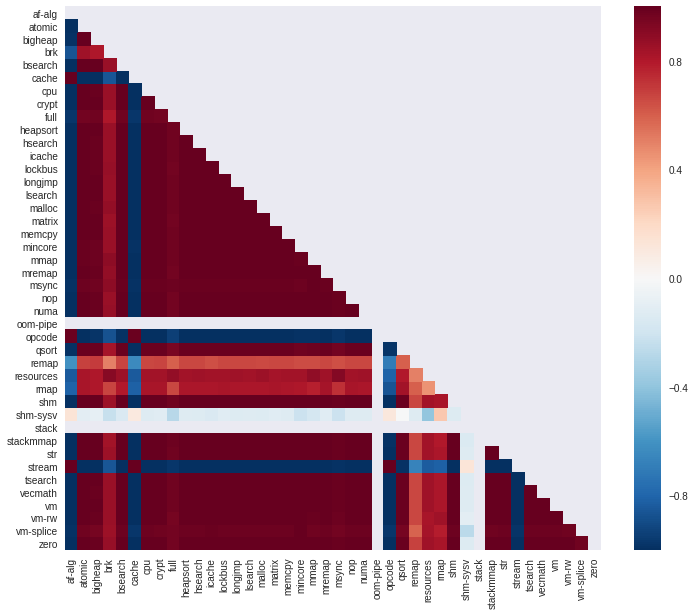

In [71]:
# plot correlation matrix for all stressors
corrmatrix = plot_corrmatrix(features[feature_columns])

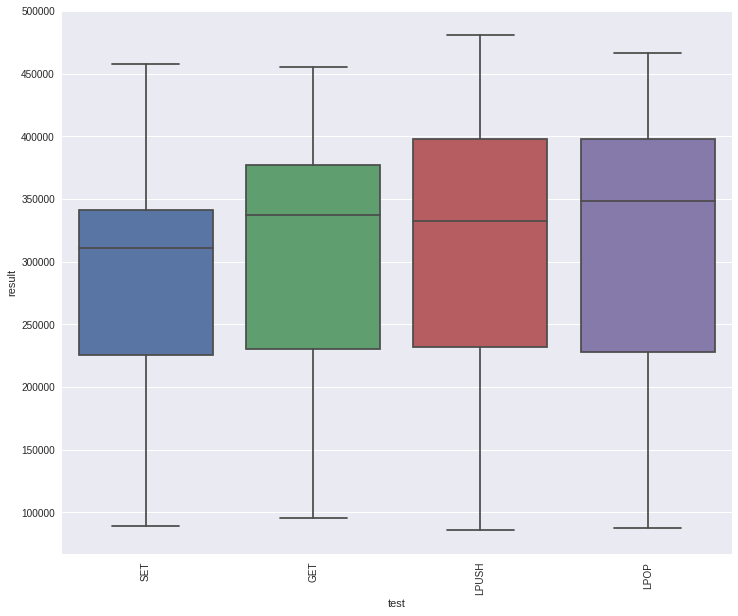

In [50]:
sns.boxplot(x='test', y='result', data=df.query('benchmark == "redisbench"'))
_ = plt.xticks(rotation=90)

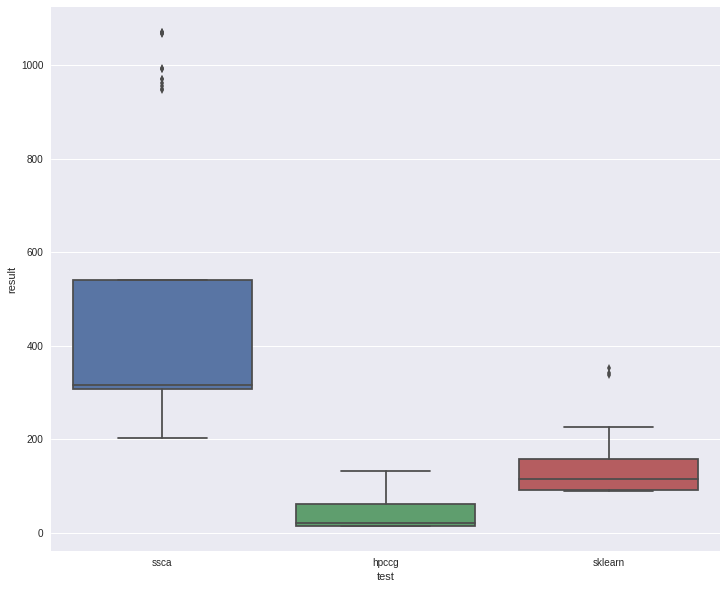

In [29]:
# plot separately
sns.boxplot(x='test', y='result', data=df.query('benchmark != "stressng" and benchmark != "redisbench"'))

In [20]:
["{} = {}".format(i, np.mean(np.abs(corrmatrix[i])) < .5) for i in corrmatrix.columns]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in absolute
  """Entry point for launching an IPython kernel.


['af-alg = True',
 'atomic = False',
 'bigheap = False',
 'brk = False',
 'bsearch = False',
 'cache = False',
 'cpu = False',
 'crypt = False',
 'full = False',
 'heapsort = False',
 'hsearch = False',
 'icache = False',
 'lockbus = False',
 'longjmp = False',
 'lsearch = False',
 'malloc = False',
 'matrix = False',
 'memcpy = False',
 'mincore = False',
 'mmap = False',
 'mremap = True',
 'msync = False',
 'nop = False',
 'numa = False',
 'oom-pipe = False',
 'opcode = False',
 'qsort = False',
 'remap = False',
 'resources = True',
 'rmap = False',
 'shm = False',
 'shm-sysv = True',
 'stack = False',
 'stackmmap = False',
 'str = False',
 'stream = True',
 'tsearch = False',
 'vecmath = False',
 'vm = False',
 'vm-rw = False',
 'vm-splice = False',
 'zero = False']

In [72]:
#memory_stressors = ['bigheap','brk','full','lockbus','malloc','mmap','mremap','msync','numa','resources','rmap','remap','shm','shm-sysv','stackmmap','stream','vm', 'vm-rw', 'vm-splice', 'zero']

#memory_stressors = ['mremap', 'msync', 'rmap', 'shm-sysv', 'stackmmap', 'stream']
#cpu_stressors = list(pd.Index(feature_columns).difference(memory_stressors))
#vm_stressors = []

cpu_stressors = ['af-alg', 'atomic', 'bsearch', 'context', 'cpu', 'cpu-online', 'crypt', 'fp-error', 'getrandom', 'heapsort', 'hsearch', 'longjmp', 'lsearch', 'matrix', 'mergesort', 'nop', 'numa', 'opcode', 'qsort', 'rdrand', 'str', 'stream', 'tsc', 'tsearch', 'vecmath', 'wcs', 'zlib']
memory_stressors = ['atomic', 'bsearch', 'context', 'full', 'heapsort', 'hsearch', 'lockbus', 'lsearch', 'malloc', 'matrix', 'membarrier', 'memcpy', 'memfd', 'mergesort', 'mincore', 'null', 'numa', 'oom-pipe', 'pipe', 'qsort', 'remap', 'resources', 'rmap', 'stack', 'stackmmap', 'str', 'stream', 'tlb-shootdown', 'tmpfs', 'tsearch', 'vm', 'vm-rw', 'wcs', 'zero', 'zlib']
vm_stressors = ['bigheap', 'brk', 'madvise', 'malloc', 'mlock', 'mmap', 'mmapfork', 'mmapmany', 'mremap', 'msync', 'shm', 'shm-sysv', 'stack', 'stackmmap', 'tmpfs', 'userfaultfd', 'vm', 'vm-rw', 'vm-splice']

In [22]:
memory_stressors

['atomic',
 'bsearch',
 'context',
 'full',
 'heapsort',
 'hsearch',
 'lockbus',
 'lsearch',
 'malloc',
 'matrix',
 'membarrier',
 'memcpy',
 'memfd',
 'mergesort',
 'mincore',
 'null',
 'numa',
 'oom-pipe',
 'pipe',
 'qsort',
 'remap',
 'resources',
 'rmap',
 'stack',
 'stackmmap',
 'str',
 'stream',
 'tlb-shootdown',
 'tmpfs',
 'tsearch',
 'vm',
 'vm-rw',
 'wcs',
 'zero',
 'zlib']

In [23]:
cpu_stressors

['af-alg',
 'atomic',
 'bsearch',
 'context',
 'cpu',
 'cpu-online',
 'crypt',
 'fp-error',
 'getrandom',
 'heapsort',
 'hsearch',
 'longjmp',
 'lsearch',
 'matrix',
 'mergesort',
 'nop',
 'numa',
 'opcode',
 'qsort',
 'rdrand',
 'str',
 'stream',
 'tsc',
 'tsearch',
 'vecmath',
 'wcs',
 'zlib']

In [73]:
# gradient boosting regression
# taken from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# extended to normalize data

rs = np.random.RandomState(1)
z_scaler = StandardScaler()

def plot_importance(data, feats, apps):
    for b in apps:
        # normalize data
        z_data = z_scaler.fit_transform(data[feats])
        
        # fit using random forest regressor
        params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
                  'learning_rate': 0.01, 'loss': 'ls'}
        regr = GradientBoostingRegressor(**params)
        regr.fit(z_data, data[b])

        # Plot feature importance
        feature_importance = regr.feature_importances_
        # make importances relative to max importance
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(feats)[sorted_idx])
        plt.xlabel('Relative Importance')
        plt.title(b)
        plt.show()

        # print aggregate importance for each class
        importances = pd.DataFrame({'feature':feats,'importance':np.round(feature_importance,3)})
        print('CPU: {}'.format(importances.sort_values(by='importance', ascending=False).query('feature in @cpu_stressors')['importance'].values[0]))
        print('MEM: {}'.format(importances.sort_values(by='importance', ascending=False).query('feature in @memory_stressors')['importance'].values[0]))
        print('VM: {}'.format(importances.sort_values(by='importance', ascending=False).query('feature in @vm_stressors')['importance'].values[0]))
        print('')

In [278]:
# taken from https://stackoverflow.com/a/5967539/389188
# {
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]
# }

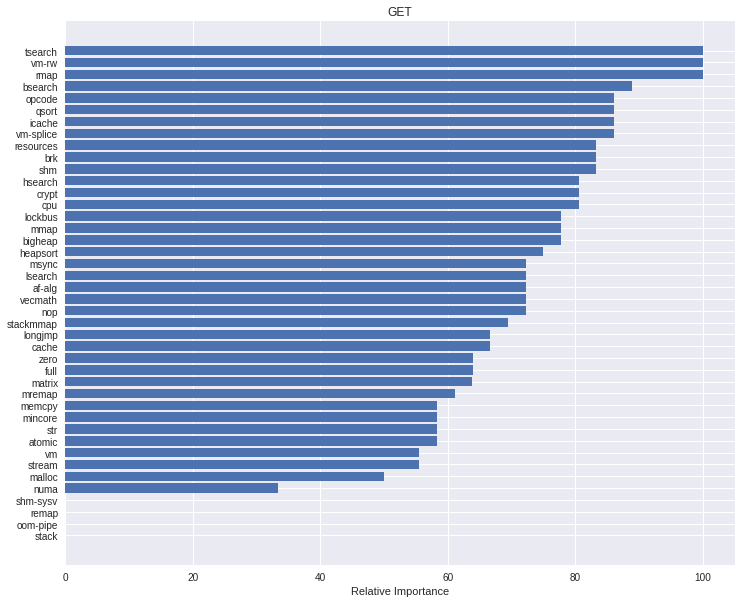

CPU: 100.0
MEM: 100.0
VM: 99.998



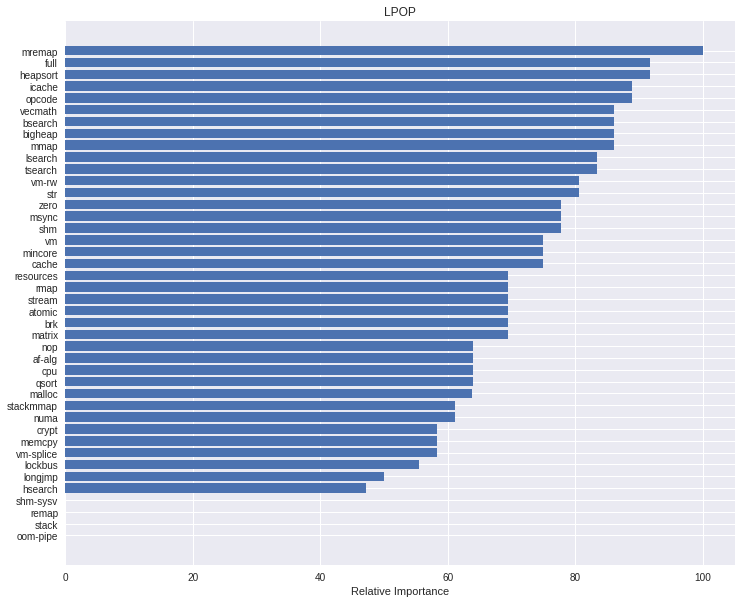

CPU: 91.664
MEM: 91.667
VM: 100.0



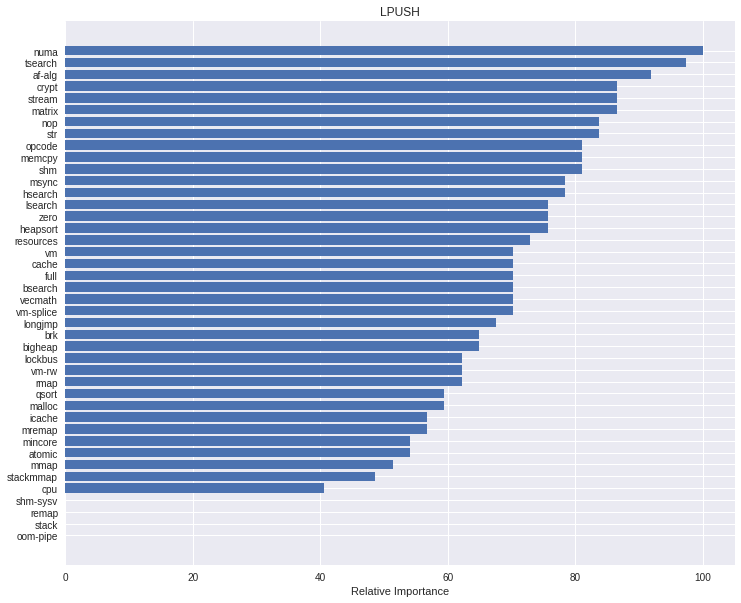

CPU: 100.0
MEM: 100.0
VM: 81.081



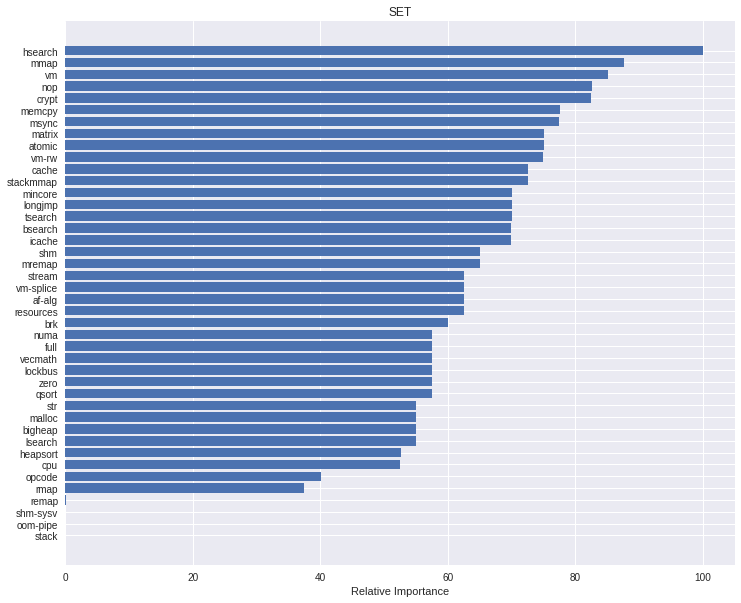

CPU: 100.0
MEM: 100.0
VM: 87.572



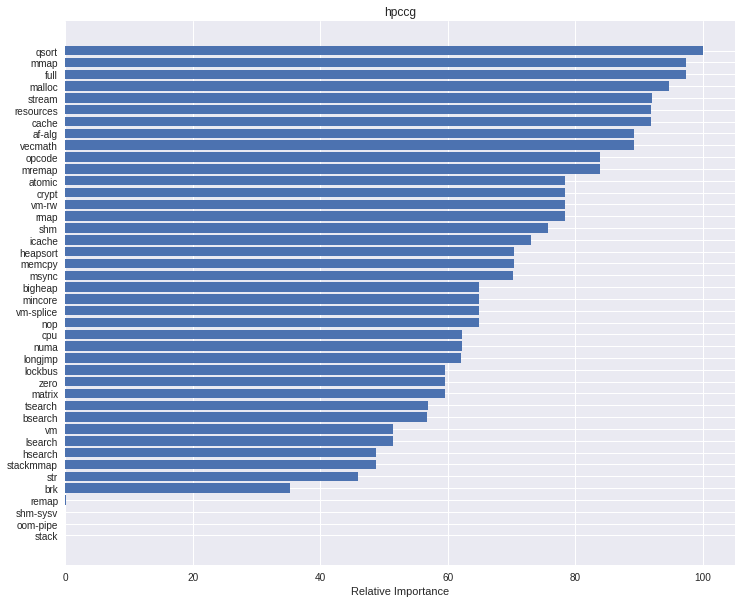

CPU: 100.0
MEM: 100.0
VM: 97.378



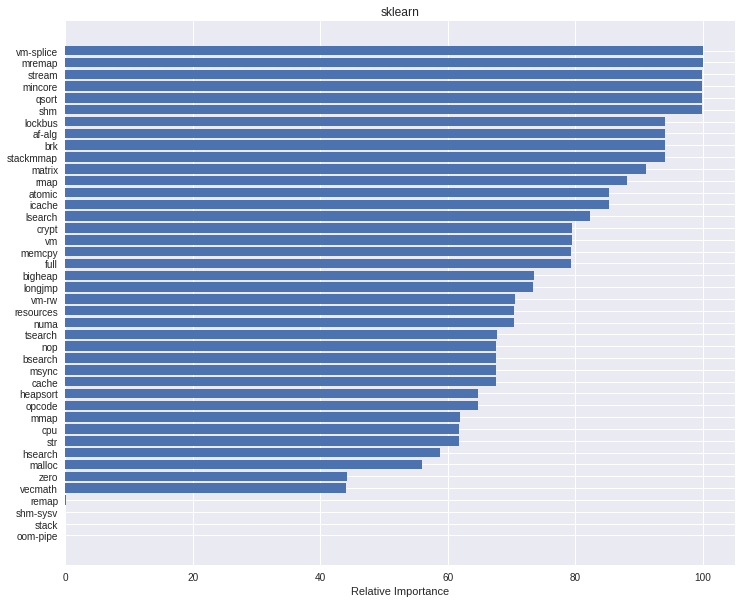

CPU: 99.934
MEM: 99.934
VM: 100.0



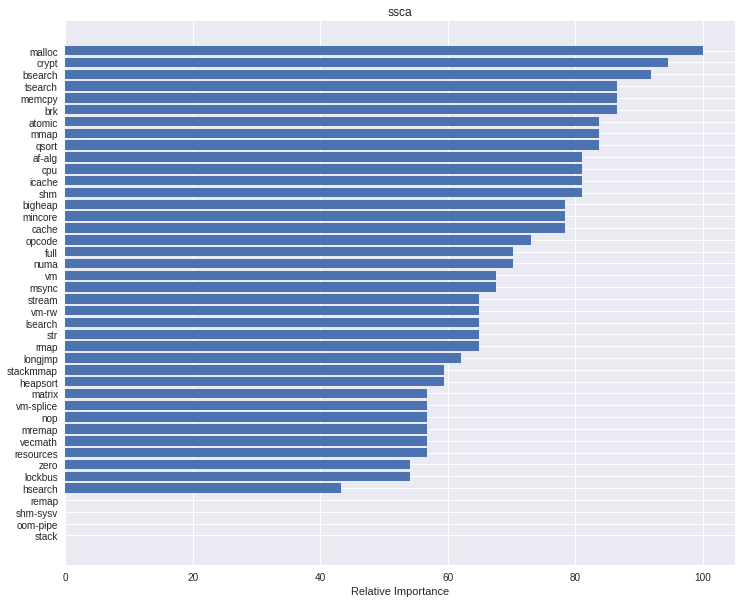

CPU: 94.602
MEM: 100.0
VM: 100.0



In [74]:
plot_importance(features, feature_columns, list(features.columns.difference(feature_columns + ['machine+repetition'])))

(0.0001, 100)

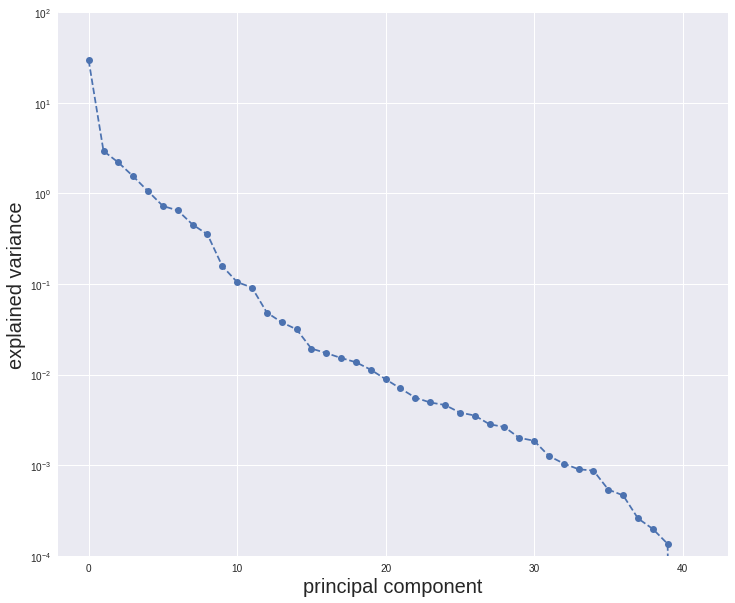

In [27]:
# taken from http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/
#            https://github.com/jotterbach/Data-Exploration-and-Numerical-Experimentation/blob/master/Data-Analytics/PCA_Pitfalls.ipynb
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(features[feature_columns])
pca_stressors_norm = PCA().fit(z_data)
plt.semilogy(pca_stressors_norm.explained_variance_, '--o')
plt.xlabel('principal component', fontsize = 20);
plt.ylabel('explained variance', fontsize = 20);
plt.ylim([.0001,100])

In [305]:
df.machine.unique()

array(['c220g1.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c220g2.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c6220.quiho2.schedock-PG0.apt.emulab.net',
       'c6320.quiho2.schedock-PG0.clemson.cloudlab.us',
       'c8220.quiho2.schedock-PG0.clemson.cloudlab.us',
       'd2100.quiho2.Schedock.emulab.net',
       'd430.quiho2.Schedock.emulab.net',
       'd530.quiho2.Schedock.emulab.net',
       'd710.quiho2.Schedock.emulab.net',
       'd820.quiho2.Schedock.emulab.net',
       'dl360.quiho2.emulab-net.utahddc.geniracks.net',
       'dwill.soe.ucsc.edu', 'issdm-41',
       'm510.quiho2.schedock-PG0.utah.cloudlab.us',
       'pc3000.quiho2.Schedock.emulab.net',
       'pc3300.quiho2.emulab-net.uky.emulab.net',
       'pc3400.quiho2.emulab-net.uky.emulab.net',
       'pc3500.quiho2.emulab-net.uky.emulab.net',
       'r320.quiho2.schedock-PG0.apt.emulab.net',
       'r720.quiho2.schedock-PG0.apt.emulab.net', 'scruffy.soe.ucsc.edu'], dtype=object)

In [315]:
df.machine.unique()

array(['c220g1.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c220g2.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c6220.quiho2.schedock-PG0.apt.emulab.net',
       'c6320.quiho2.schedock-PG0.clemson.cloudlab.us',
       'c8220.quiho2.schedock-PG0.clemson.cloudlab.us',
       'd2100.quiho2.Schedock.emulab.net',
       'd430.quiho2.Schedock.emulab.net',
       'd530.quiho2.Schedock.emulab.net',
       'd710.quiho2.Schedock.emulab.net',
       'd820.quiho2.Schedock.emulab.net',
       'dl360.quiho2.emulab-net.utahddc.geniracks.net',
       'dwill.soe.ucsc.edu', 'issdm-41',
       'm510.quiho2.schedock-PG0.utah.cloudlab.us',
       'pc3000.quiho2.Schedock.emulab.net',
       'pc3300.quiho2.emulab-net.uky.emulab.net',
       'pc3400.quiho2.emulab-net.uky.emulab.net',
       'pc3500.quiho2.emulab-net.uky.emulab.net',
       'r320.quiho2.schedock-PG0.apt.emulab.net',
       'r720.quiho2.schedock-PG0.apt.emulab.net', 'scruffy.soe.ucsc.edu'], dtype=object)

(0.0001, 100)

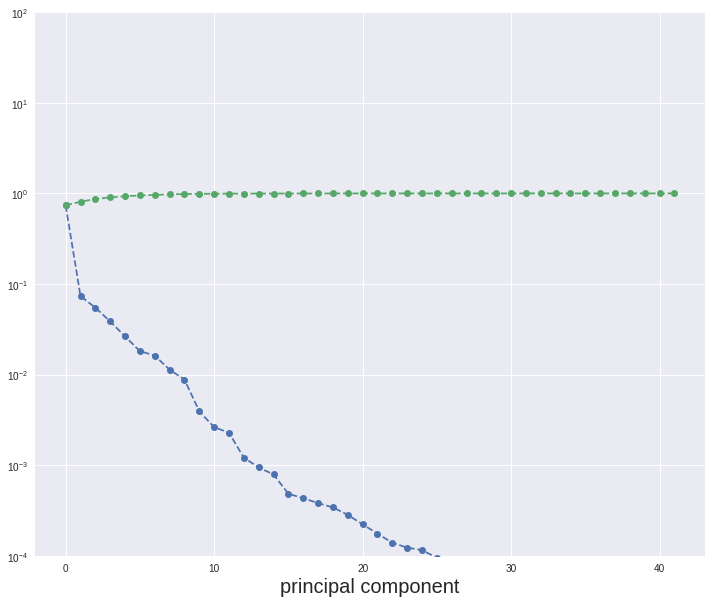

In [30]:
plt.semilogy(pca_stressors_norm.explained_variance_ratio_, '--o');
plt.semilogy(pca_stressors_norm.explained_variance_ratio_.cumsum(), '--o');
plt.xlabel('principal component', fontsize = 20);
plt.ylim([.0001,100])

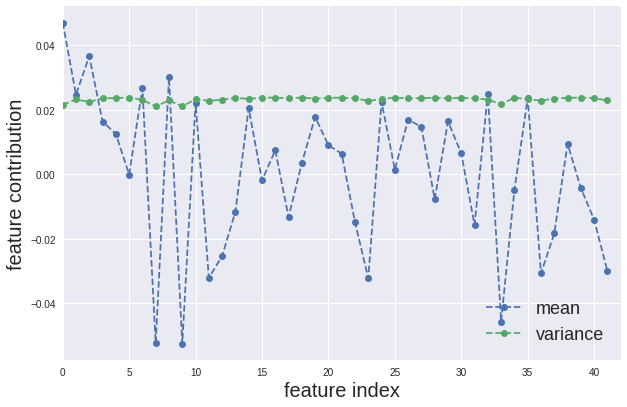

In [31]:
n_comp = len(feature_columns)
pca_inv_data = pca_stressors_norm.inverse_transform(np.eye(n_comp))
fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major');
plt.tick_params(axis='both', which='minor');
plt.xlim([0, len(feature_columns)])
plt.legend(loc='lower right', fontsize=18)

In [32]:
# show indices where mean of variance is greater than a threshold
mean_threshold=0.035
np.where(np.abs(pca_inv_data.mean(axis=0)) > mean_threshold)

(array([ 0,  2,  7,  9, 33]),)

In [33]:
# show which stressors they correspond to
most_relevant = list(np.array(feature_columns)[np.where(np.abs(pca_inv_data.mean(axis=0)) > mean_threshold)])
most_relevant

['af-alg', 'bigheap', 'crypt', 'heapsort', 'stackmmap']